<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [27]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [29]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [30]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
# Verificar as colunas do DataFrame
print(boston_df.columns)

# Exibir informações gerais do DataFrame
print(boston_df.info())

# Exibir estatísticas descritivas
print(boston_df.describe())

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB
None
       Unnamed: 0        CRIM  

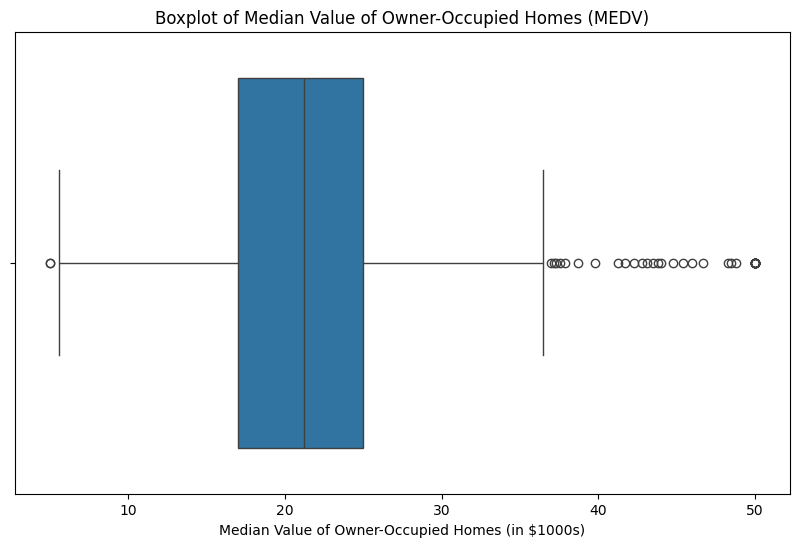

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.show()

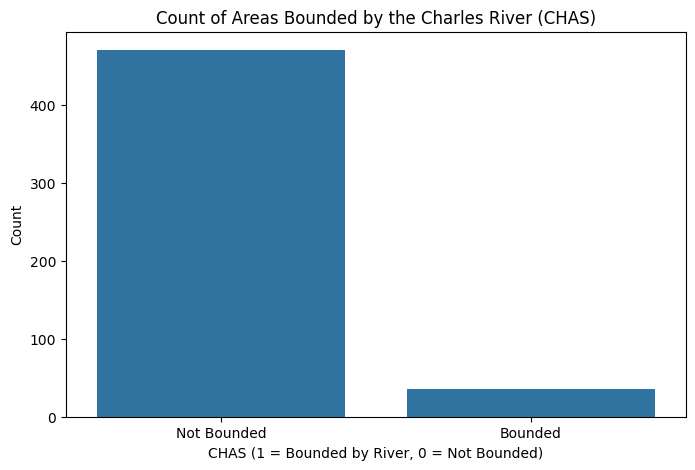

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Count of Areas Bounded by the Charles River (CHAS)')
plt.xlabel('CHAS (1 = Bounded by River, 0 = Not Bounded)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Bounded', 'Bounded'])
plt.show()

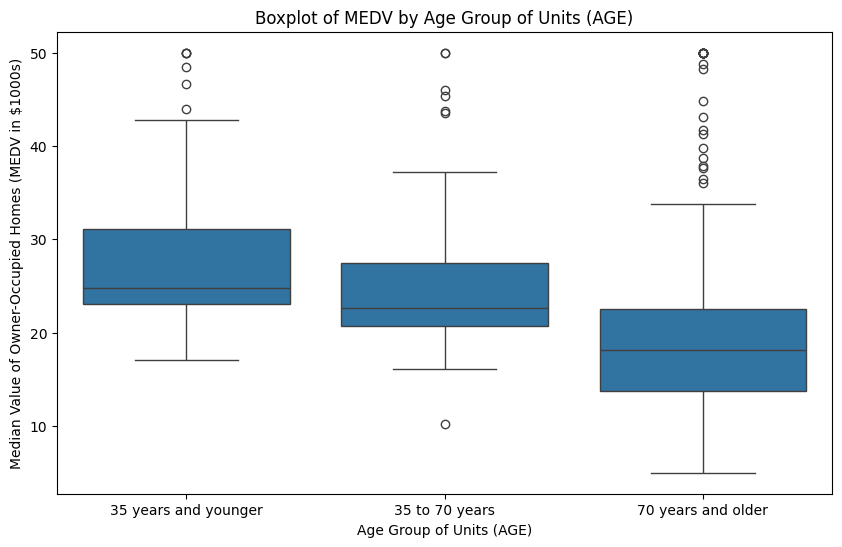

In [16]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group of Units (AGE)')
plt.xlabel('Age Group of Units (AGE)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV in $1000s)')
plt.show()

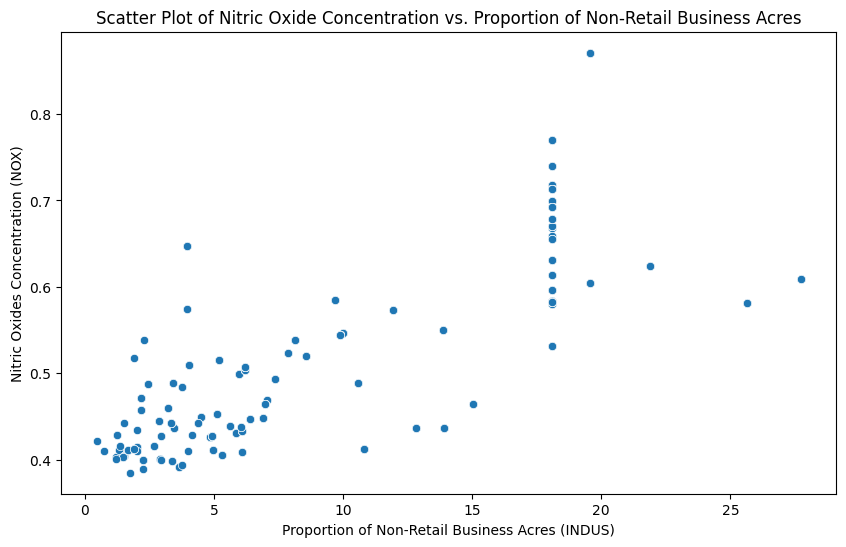

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentration vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

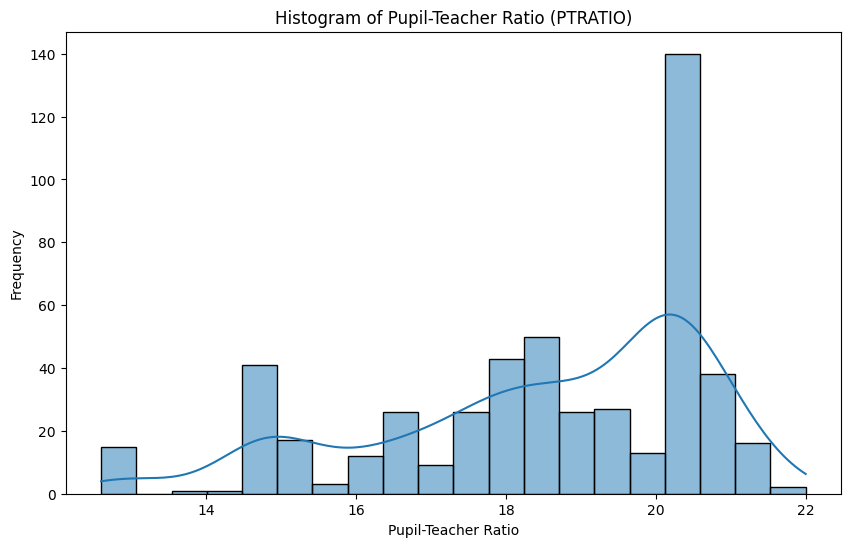

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Teste T para MEDV entre os grupos Charles River (CHAS)
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Grupo que está à beira do rio
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Grupo que não está à beira do rio

# Realizando o teste T
t_stat, p_value = stats.ttest_ind(group1, group2)

# Mostrando os resultados
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Hipóteses
# H0: Não há diferença significativa nas medianas
# H1: Há uma diferença significativa nas medianas

# Conclusão do teste
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: há uma diferença significativa nas medianas.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa nas medianas.")

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Rejeitamos a hipótese nula: há uma diferença significativa nas medianas.


In [33]:
# Discretizando a variável AGE em grupos
def age_group(age):
    if age <= 35:
        return '35 years and younger'
    elif 35 < age <= 70:
        return '35 to 70 years'
    else:
        return '70 years and older'

boston_df['AGE_GROUP'] = boston_df['AGE'].apply(age_group)

# Realizando ANOVA para MEDV baseado nos grupos de idade
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35 to 70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']
)

# Mostrando os resultados do ANOVA
print(f"ANOVA F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

# Hipóteses
# H0: Não há diferença significativa nas medianas
# H1: Há uma diferença significativa nas medianas

# Conclusão do teste
if anova_result.pvalue < 0.05:
    print("Rejeitamos a hipótese nula: há uma diferença significativa nas medianas.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa nas medianas.")

ANOVA F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Rejeitamos a hipótese nula: há uma diferença significativa nas medianas.


In [34]:
# Correlação de Pearson entre NOX e INDUS
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")


Pearson Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98
Rejeitamos a hipótese nula.


In [35]:
# Análise de regressão
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adicionando constante ao modelo

model = sm.OLS(y, X).fit()
print(model.summary())

if model.pvalues[1] < 0.05:  # Verificando o p-valor da variável DIS
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        12:03:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<ipython-input-35-f608ca83c08f>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < 0.05:  # Verificando o p-valor da variável DIS


Rejeitamos a hipótese nula.
